<a href="https://colab.research.google.com/github/KandamuruAdityamanoj/AI-ML-Internship-by-Tech-Mythree/blob/main/Task_12classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/AI-ML Internship/Task 12/train.csv')
test=pd.read_csv('/content/drive/MyDrive/AI-ML Internship/Task 12/test.csv')

In [ ]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
train.shape

(2000, 21)

In [ ]:
test.shape

(1000, 21)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
correlation_matrix= train.corr()
correlation_matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


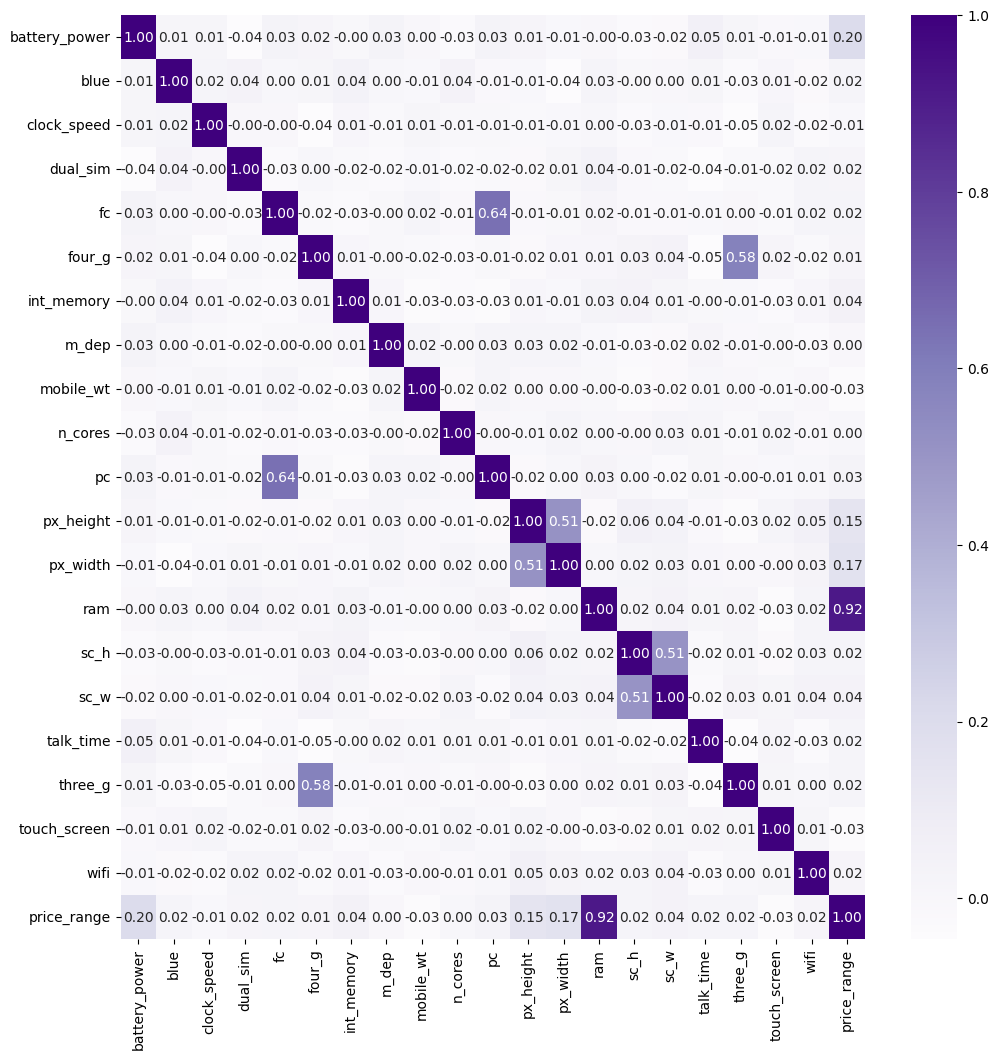

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap="Purples", fmt=".2f")
plt.show()


In [ ]:
test.drop("id", axis=1, inplace=True)

In [ ]:
def train_test_split_data(dataframe,target,test_size, random_state):
    x_train,x_test, y_train, y_test= train_test_split(dataframe.drop([target], axis=1),
                                                      dataframe[target],
                                                      test_size=test_size,
                                                      random_state=random_state,
                                                      stratify=dataframe[target]
                                                      )

    return x_train,x_test, y_train, y_test

In [ ]:
x_train,x_test, y_train, y_test= train_test_split_data(train, target="price_range",test_size=0.3, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1400, 20), (600, 20), (1400,), (600,))

In [ ]:
def Winsorization_Method(columns, x_train, y_train , a, b):
    outliers=[]

    for col in columns:
        q1= np.percentile(x_train[col], a)
        q2= np.percentile(x_train[col],b)

        for pos in range(len(x_train)):
            if x_train[col].iloc[pos]>q2 or x_train[col].iloc[pos]<q1:
                outliers.append(pos)

    outliers= set(outliers)                   # remove the duplicates from the outliers
    outliers= list(outliers)

    ratio= round(len(outliers)/len(x_train)*100, 2)                       # Ratio of outliers
    x_train.drop(x_train.index[outliers], inplace=True)    # remove the outliers from the training dataset
    y_train.drop(y_train.index[outliers], inplace=True)



    return ratio, x_train, y_train

In [ ]:
ratio, x_train, y_train= Winsorization_Method(x_train.select_dtypes(exclude="object").columns, x_train, y_train , a=1, b=99)

In [ ]:
x_train.shape, y_train.shape

((1262, 20), (1262,))

In [ ]:
print(f"Ratio of Outliers Detected in the dataset:{ratio}")

Ratio of Outliers Detected in the dataset:9.86


In [ ]:
robust_scaler= RobustScaler()
x_train=robust_scaler.fit_transform(x_train)
x_test=robust_scaler.transform(x_test)

In [ ]:
def modelling(x_train, x_test, y_train, y_test):

    cv_result = []
    best_estimators = []
    recall_scores = []
    precision_scores = []
    roc_auc_scores = []
    f1_scores = []

    classifiers = [DecisionTreeClassifier(),
             RandomForestClassifier(),
             LogisticRegression(random_state=0),
             GradientBoostingClassifier(),
             ]

    dt_param_grid = {"min_samples_split" : range(10,500,20),
                     "max_depth": range(1,20,2)}


    rf_param_grid = {"max_features": [1,3,10],
                     "min_samples_split":[2,3,10],
                     "min_samples_leaf":[1,3,10],
                     "n_estimators":[100,300],
                     "criterion":["gini"]}


    logreg_param_grid = {"C":np.logspace(-4, 4, 20),
                         "penalty": ["l1","l2","None"],
                         "max_iter":[1000]}
    gbc_param_grid = {
                      "learning_rate": [0.05, 0.1, 0.2],
                      "min_samples_split": [2,3,10],
                      "min_samples_leaf": [1,3,10]
                      }


    classifier_parameters = [dt_param_grid,
                            rf_param_grid,
                            logreg_param_grid,
                            gbc_param_grid,
                             ]

    for i in range(len(classifiers)):
        model= GridSearchCV(classifiers[i], classifier_parameters[i], cv=5, scoring ="accuracy", n_jobs = -1)
        model.fit(x_train, y_train)
        y_pred= model.predict(x_test)

        cv_result.append(model.best_score_)
        roc_auc_scores.append(roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr'))
        recall_scores.append(recall_score(y_pred, y_test,average='macro'))
        precision_scores.append(precision_score(y_pred, y_test,average='macro'))
        f1_scores.append(f1_score(y_pred, y_test,average='macro'))
        best_estimators.append(model.best_estimator_)


        print(f"Model:{classifiers[i]}")
        print(f"Accuracy:{round(cv_result[i]*100,2)}")
        print(f"ROC AUC:{roc_auc_scores[i]}")
        print(f"Recall:{recall_scores[i]}")
        print(f"Precision:{precision_scores[i]}")
        print(f"F1-Score:{f1_scores[i]}")
        print(f"Best Estimator:{model.best_estimator_}")
        print("---------------------------------------------------------------------------------------------------------------")



    model_names = ['DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','GradientBoostingClassifier']
    result_df = pd.DataFrame({'Recall':recall_scores, 'Precision':precision_scores, 'F1_Score':f1_scores,'AUC_Score':roc_auc_scores, 'Accuracy': cv_result,},index=model_names)
    result_df=result_df.sort_values(by="AUC_Score", ascending=False)
    return result_df

In [ ]:
result_df


,Recall,Precision,F1_Score,AUC_Score,Accuracy
LogisticRegression,0.970249,0.970000,0.970054,0.999122,0.963549
GradientBoostingClassifier,0.913593,0.913333,0.913123,0.987774,0.885115
RandomForestClassifier,0.894910,0.895000,0.894883,0.987719,0.882744
DecisionTreeClassifier,0.828671,0.826667,0.826439,0.950780,0.815374


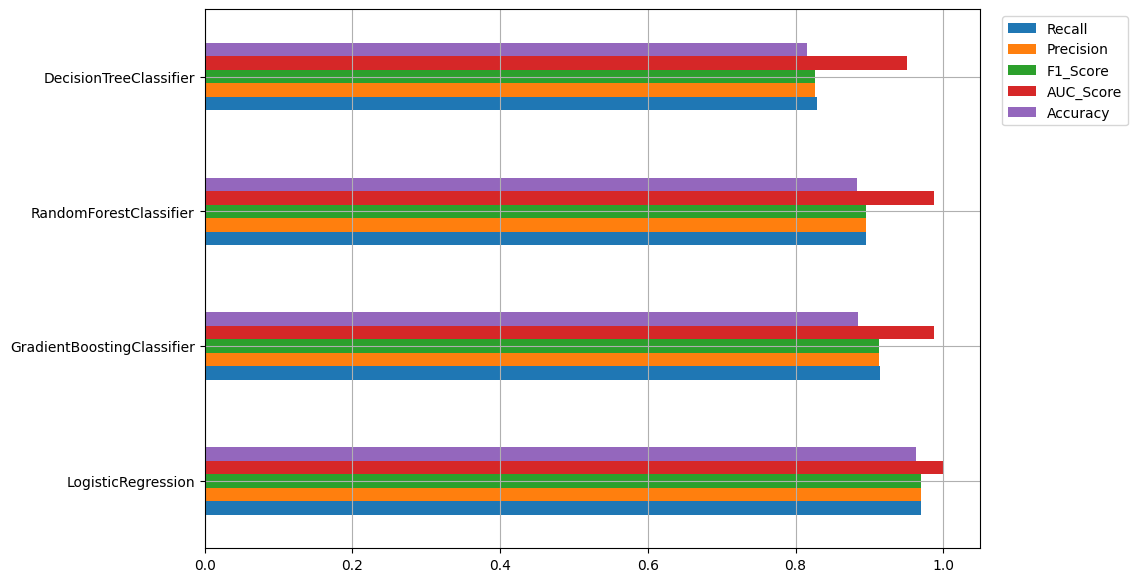

In [ ]:
result_df.plot(kind="barh", figsize=(10, 7), grid=True).legend(bbox_to_anchor=(1.2,1));